# 2_3 Mileage Distribution by EV Models

C:\Users\varun\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Text(0, 0.5, 'Mileage')

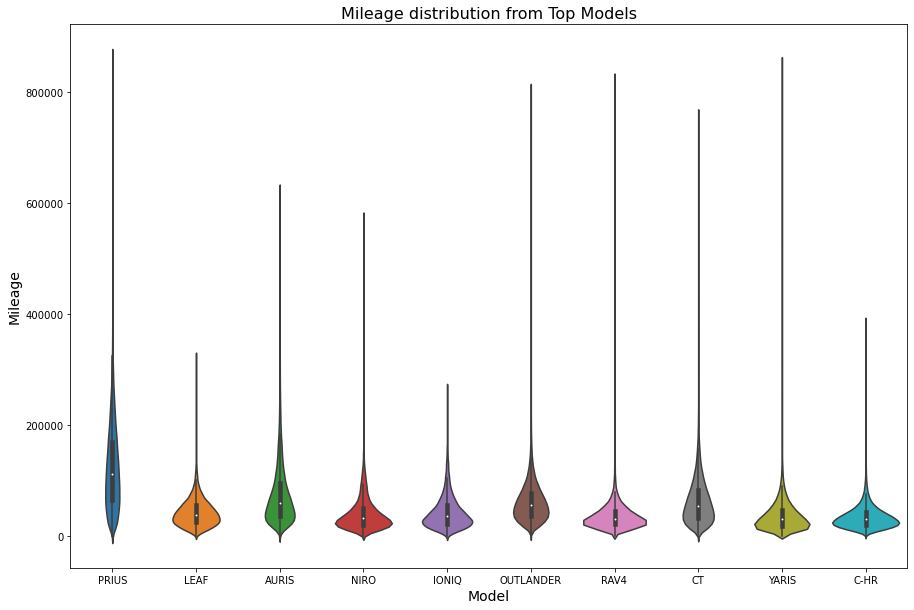

In [1]:

######### 2_3 VIOLIN PLOT OF MILEAGE DISTRIBUTION VS TOP MODELS #########

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Manually replace the file path
csv_url = 'C:/Users/samar/Downloads/dft_test_result_2022/test_result.csv'
df = pd.read_csv(csv_url, delimiter = '|', error_bad_lines=False)
df = df[df['fuel_type'].isin(['EL', 'Electric', 'HY' , 'Hybrid Electric (Clean)'])]
# calculating age
df['present'] = df['test_date'].str[-4:]
df['present'] = pd.to_numeric(df['present'], errors='coerce')
df['start'] = df['first_use_date'].str[-4:]
df['start'] = pd.to_numeric(df['start'], errors='coerce')
df['age'] = df['present'] - df['start']
# Define a function to check if the value is less than 8 and return 1, otherwise 0
def assign_value_less_80(x):
    return 1 if x > 8 else 0
df['boh_below_80'] = df['age'].apply(assign_value_less_80)
def assign_value_80_90(x):
    return 1 if 5 <= x <= 8 else 0
df['boh_80-90'] = df['age'].apply(assign_value_80_90)
def assign_value_above_90(x):
    return 1 if x < 5 else 0
df['boh_above_90'] = df['age'].apply(assign_value_above_90)
# Calculate the counts of each string in the column
string_counts = df['model'].value_counts()
df['model_count'] = df['model'].map(string_counts)
ma_count = df['make'].value_counts()
df['make_count'] = df['make'].map(ma_count)
columns_to_drop = [0,1,3,4,5,7,10]
df.drop(df.columns[columns_to_drop], axis=1, inplace=True)
print(df.head(10))

############################################################################

########## 2_3 VIOLIN PLOT OF MILEAGE DISTRIBUTION VS TOP MODELS ##########

# Manually enter top 10 models as it is mentioned in the data
top_ten_models = ['PRIUS', 'YARIS', 'AURIS', 'OUTLANDER', 'C-HR', 'LEAF', 'CT', 'RAV4', 'IONIQ', 'NIRO']

# # Create a new DataFrame with grouped strings
# top_ten = df[df['model'].isin(top_ten_models)].groupby('model').size().reset_index(name='count')
# top_ten = top_ten.sort_values(by='count', ascending=False)

# Filter the DataFrame to include only rows with 'column_name' matching the strings in 'strings_to_filter'
filtered_df = df[df['model'].isin(top_ten_models)]
columns_to_drop_2 = [0,2,4,5,6,7,8,9,10,11,12,13,14]
filtered_df.drop(filtered_df.columns[columns_to_drop_2], axis=1, inplace=True)

# Create a vertical violin plot
plt.figure(figsize=(15, 10))
sns.violinplot(x='model', y='test_mileage', data=filtered_df, orient='v')
plt.title('Mileage distribution from Top Models', fontsize=16)  # Title of the violin plot
plt.xlabel('Model', fontsize=14)            # X-axis label
plt.ylabel('Mileage', fontsize=14)  
# print(filtered_df)

############################################################################
